**AZ Watch** is a popular video streaming platform specialized in educational content, where creators publish online video tutorials and lessons about any topic, from speaking a new language to cooking to learning to play a musical instrument.

Their next goal is to leverage AI-driven solutions to analyze and make predictions about their subscribers and improve their marketing strategy around attracting new subscribers and retaining current ones. This project uses machine learning to predict subscribers likely to churn and find customer segments. This may help AZ Watch find interesting usage patterns to build subscriber personas in future marketing plans!

![Woman working on multiple screens](marketinganalytics.jpg)


The `data/AZWatch_subscribers.csv` **dataset** contains information about subscribers and their status over the last year:

|Column name|Description|
|-----------|-----------|
|`subscriber_id`|The unique identifier of each subscriber user|
|`age_group`|The subscriber's age group|
|`engagement_time`|Average time (in minutes) spent by the subscriber per session|
|`engagement_frequency`|Average weekly number of times the subscriber logged in the platform (sessions) over a year period|
|`subscription_status`|Whether the user remained subscribed to the platform by the end of the year period (subscribed), or unsubscribed and terminated her/his services (churned)|

Carefully observe and analyze the features in the dataset, asking yourself if there are any **categorical attributes** requiring pre-processing?

The subscribers dataset from the `data/AZWatch_subscribers.csv` file is already being loaded and split into training and test sets for you:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

# Specify the file path of your CSV file
file_path = "data/AZWatch_subscribers.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Summary statistics
print("Summary statistics:")
print(df.describe(include='all'))

Summary statistics:
        subscriber_id    age_group  ...  engagement_frequency  subscription_status
count     1000.000000         1000  ...           1000.000000                 1000
unique            NaN            3  ...                   NaN                    2
top               NaN  35 and over  ...                   NaN           subscribed
freq              NaN          408  ...                   NaN                  553
mean     15024.803000          NaN  ...              9.978000                  NaN
std       2927.044957          NaN  ...              6.236859                  NaN
min      10000.000000          NaN  ...              0.000000                  NaN
25%      12452.500000          NaN  ...              5.000000                  NaN
50%      15184.000000          NaN  ...              8.000000                  NaN
75%      17481.250000          NaN  ...             15.000000                  NaN
max      19976.000000          NaN  ...             45.000000      

In [2]:
# Check for missing values and data types
print("\nMissing values and data types:")
print(df.info())


Missing values and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subscriber_id         1000 non-null   int64  
 1   age_group             1000 non-null   object 
 2   engagement_time       1000 non-null   float64
 3   engagement_frequency  1000 non-null   int64  
 4   subscription_status   1000 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB
None


In [3]:
# Separate predictor variables from class label
X = df.drop(['subscriber_id', 'subscription_status'], axis=1)
y = df.subscription_status

# Split into training and test sets (20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data processing: Apply One Hot Encoding on the categorical attribute: age_group
X_train_prepared = pd.get_dummies(X_train, columns=['age_group'])
X_test_prepared = pd.get_dummies(X_test, columns=['age_group'])

# Logistic Regression Classifier
model1 = LogisticRegression()
model1.fit(X_train_prepared, y_train)
y_pred1 = model1.predict(X_test_prepared)
score1 = model1.score(X_test_prepared, y_test)
print("\nLogistic Regression accuracy score: ", score1)


Logistic Regression accuracy score:  0.925


In [4]:
# Decision Tree Classifier
model2 = DecisionTreeClassifier(max_depth=3, criterion="gini")
model2.fit(X_train_prepared, y_train)
y_pred2 = model2.predict(X_test_prepared)
score2 = model2.score(X_test_prepared, y_test)
print("\nDecision Tree accuracy score: ", score2)


Decision Tree accuracy score:  0.92


In [5]:
# Random Forest Classifier
model3 = RandomForestClassifier(n_estimators=10, max_depth=3)
model3.fit(X_train_prepared, y_train)
y_pred3 = model3.predict(X_test_prepared)
score3 = model3.score(X_test_prepared, y_test)
print("\nRandom Forest accuracy score: ", score3)


Random Forest accuracy score:  0.92


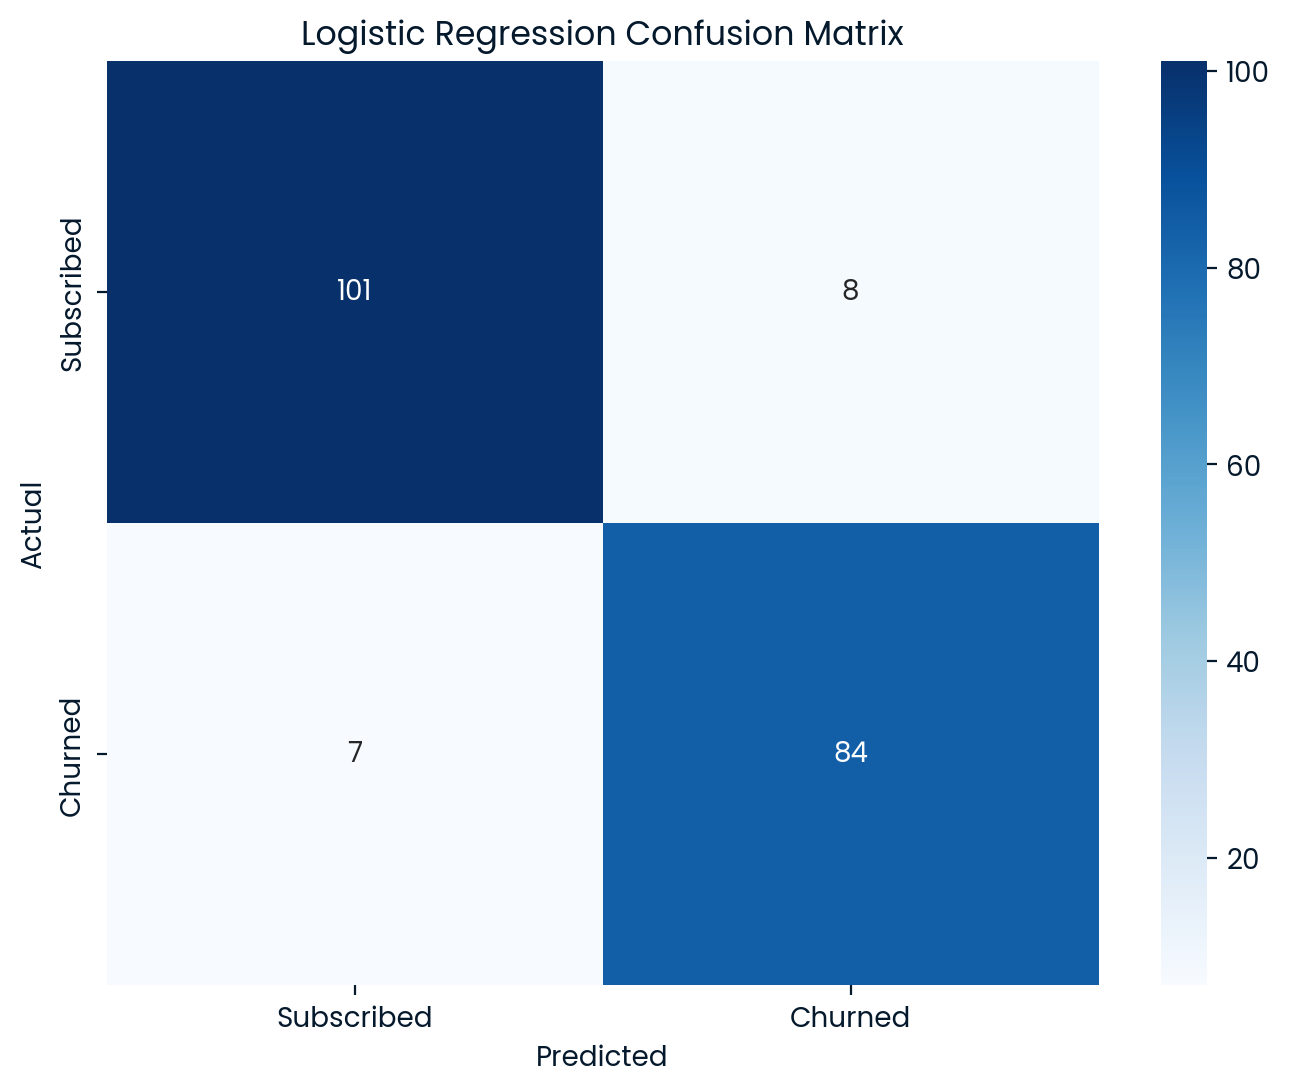

              precision    recall  f1-score   support

  Subscribed       0.91      0.92      0.92        91
     Churned       0.94      0.93      0.93       109

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.93      0.93       200



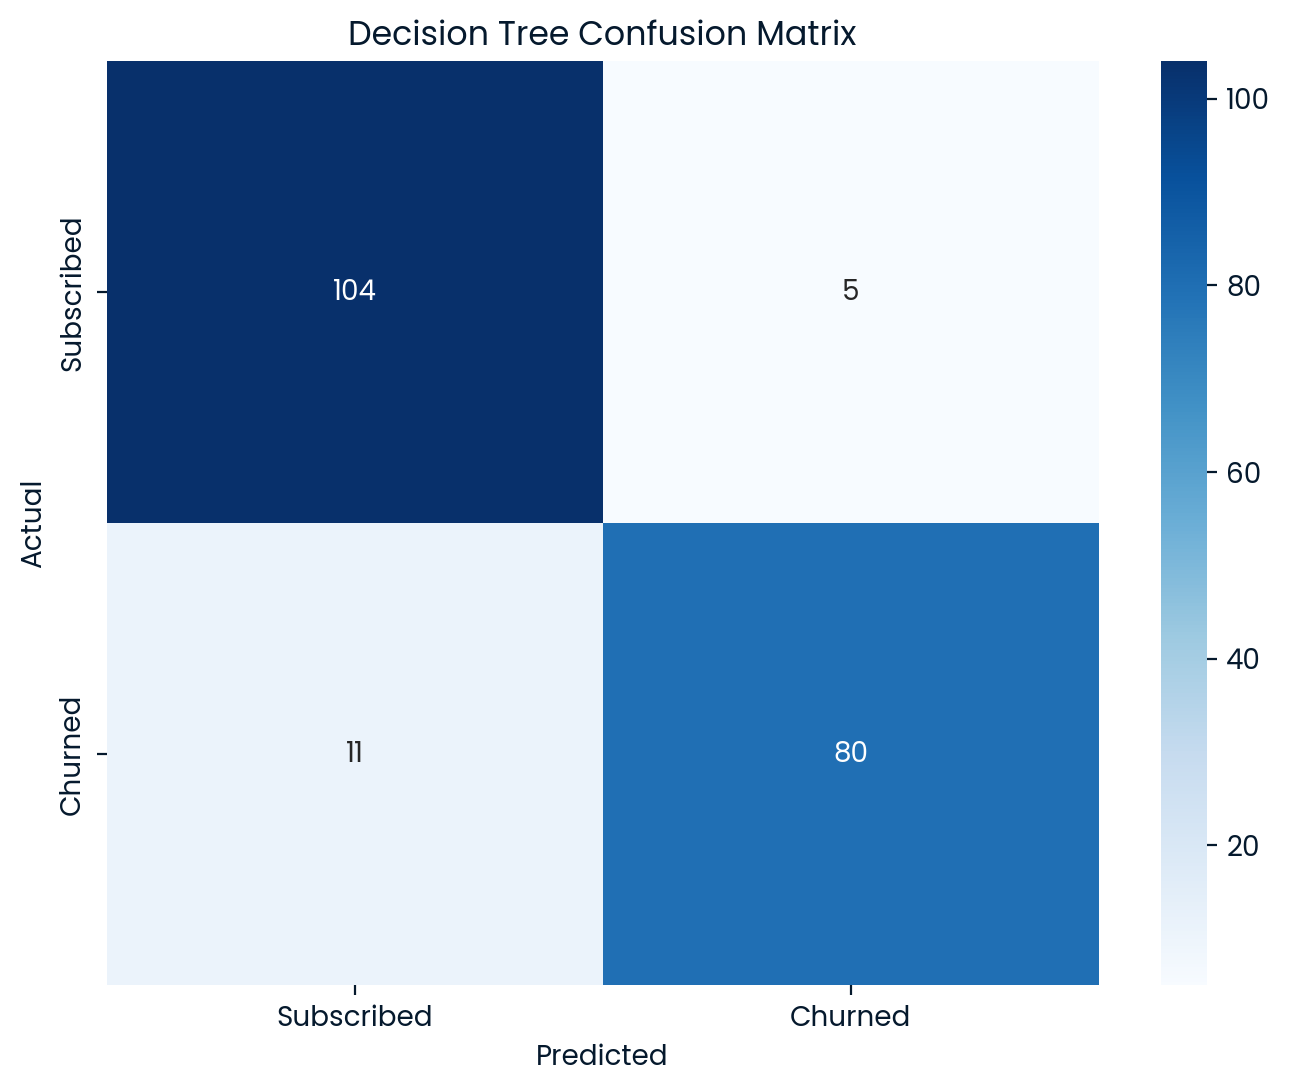

              precision    recall  f1-score   support

  Subscribed       0.94      0.88      0.91        91
     Churned       0.90      0.95      0.93       109

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



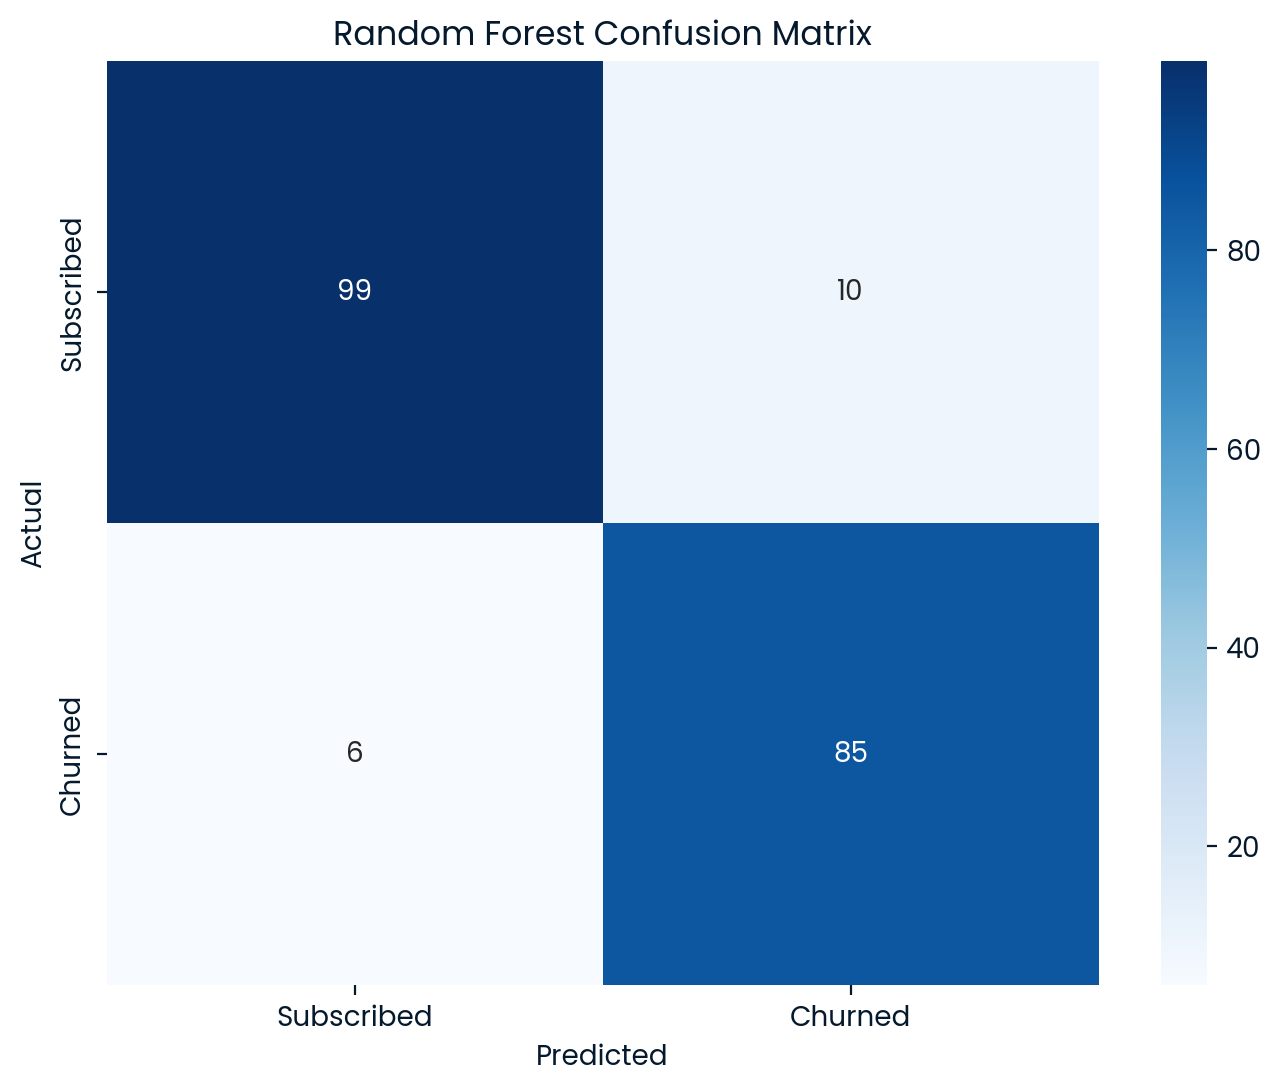

              precision    recall  f1-score   support

  Subscribed       0.89      0.93      0.91        91
     Churned       0.94      0.91      0.93       109

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [6]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred, labels=['subscribed', 'churned'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Subscribed', 'Churned'], yticklabels=['Subscribed', 'Churned'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Define a function to print classification report
def print_classification_report(y_true, y_pred):
    report = classification_report(y_true, y_pred, target_names=['Subscribed', 'Churned'])
    print(report)

# Plot confusion matrix and print classification reports
plot_confusion_matrix(y_test, y_pred1, title='Logistic Regression Confusion Matrix')
print_classification_report(y_test, y_pred1)

plot_confusion_matrix(y_test, y_pred2, title='Decision Tree Confusion Matrix')
print_classification_report(y_test, y_pred2)

plot_confusion_matrix(y_test, y_pred3, title='Random Forest Confusion Matrix')
print_classification_report(y_test, y_pred3)

In [7]:
# Subscriber Segmentation
segmentation = X.drop(['age_group'], axis=1)

# Scale the numerical features
scaler = StandardScaler()
segmentation_normalized = scaler.fit_transform(segmentation)

# Use the elbow method to choose the number of clusters
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(segmentation_normalized)
    sse[k] = kmeans.inertia_

# Print SSE values for each k
print("\nSSE values for different k:")
for k, sse_value in sse.items():
    print(f"k={k}: SSE={sse_value}")


SSE values for different k:
k=1: SSE=1999.9999999999995
k=2: SSE=1048.9425129598517
k=3: SSE=675.2721572161314
k=4: SSE=514.991452176335
k=5: SSE=422.26472225049696
k=6: SSE=357.69279961933887
k=7: SSE=317.60898757605435
k=8: SSE=284.27995662044844
k=9: SSE=257.18309705268223
k=10: SSE=235.7722128219334
k=11: SSE=213.58537466786225
k=12: SSE=198.35921000743443
k=13: SSE=182.83749745727226
k=14: SSE=171.18568664125706
k=15: SSE=158.26173116375625
k=16: SSE=151.6928332179961
k=17: SSE=143.31280980830098
k=18: SSE=135.8247491612796
k=19: SSE=129.1158567782722


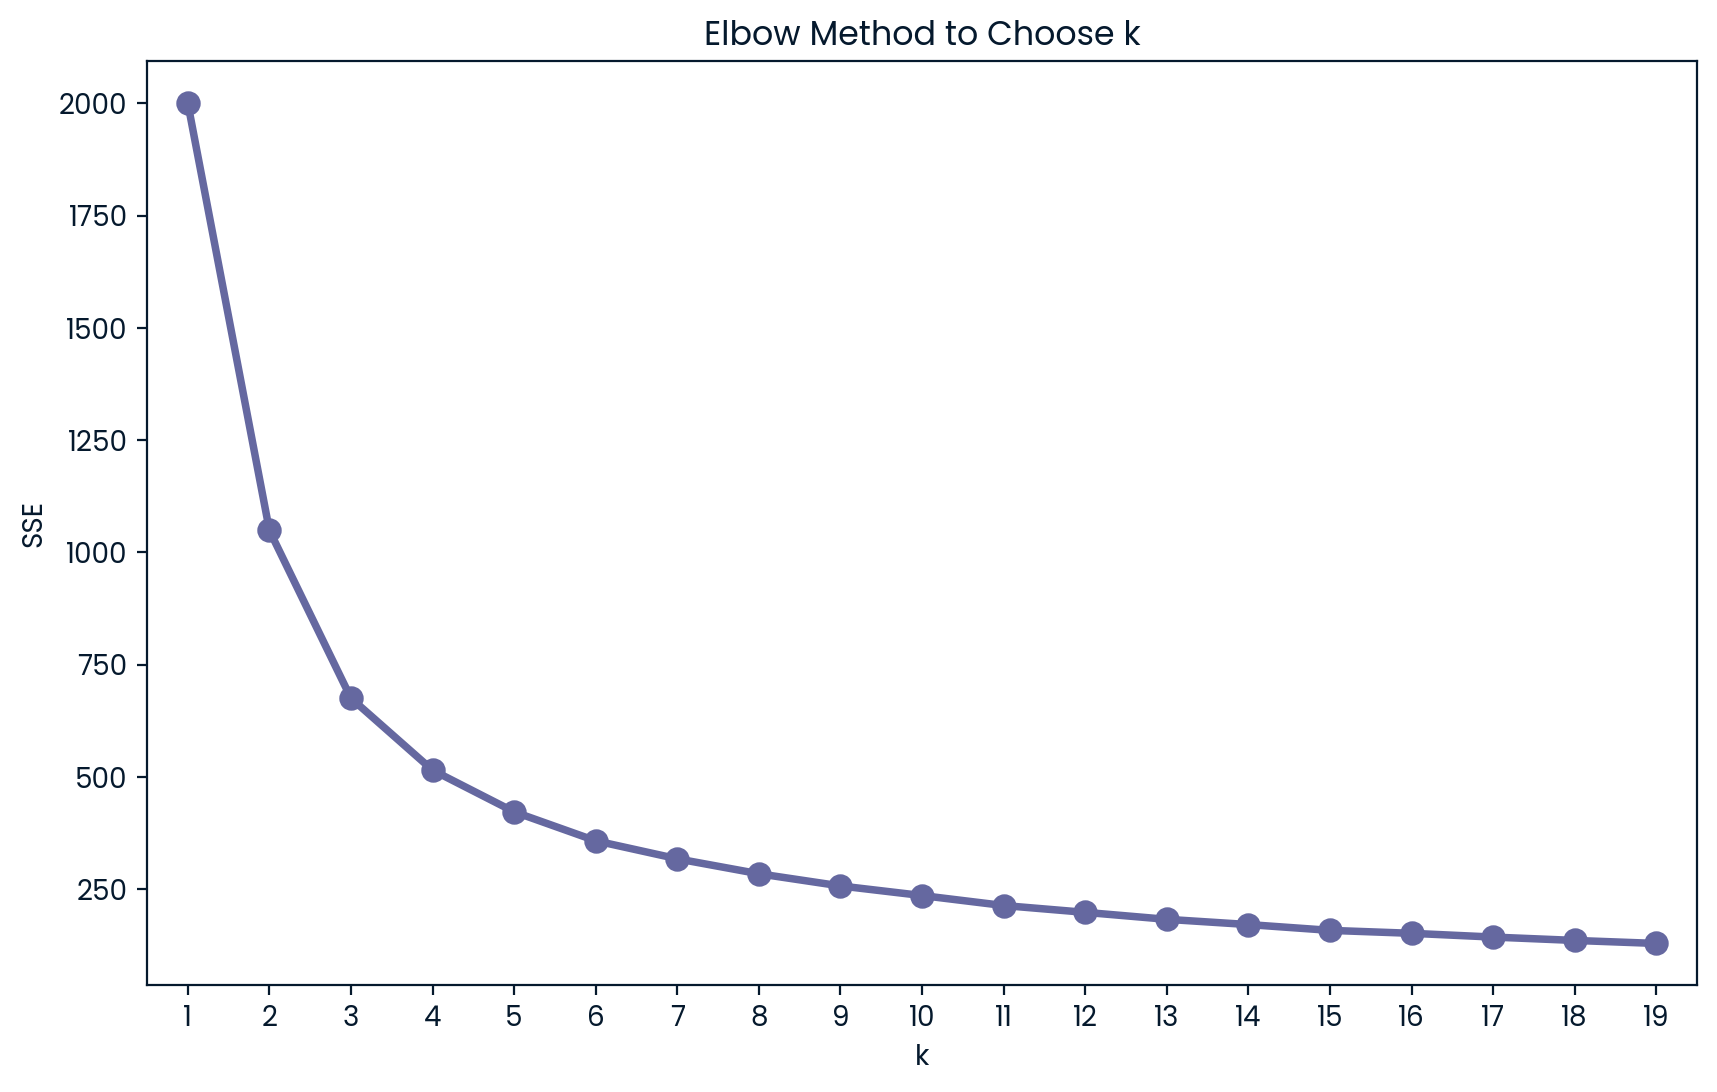


Subscriber counts per cluster:
1    444
0    289
2    267
Name: cluster_id, dtype: int64


In [8]:
# Plot the elbow method results
plt.figure(figsize=(10, 6))
plt.title('Elbow Method to Choose k')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

# Apply k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)
segmentation['cluster_id'] = kmeans.fit_predict(segmentation_normalized)

# Print the count of subscribers in each cluster
print("\nSubscriber counts per cluster:")
print(segmentation['cluster_id'].value_counts())

In [9]:
# Analyze average feature values and counts per cluster
analysis = segmentation.groupby('cluster_id').agg({
    'engagement_time': 'mean',
    'engagement_frequency': 'mean'
}).round(0)

print("\nCluster Analysis Results:")
print(analysis)


Cluster Analysis Results:
            engagement_time  engagement_frequency
cluster_id                                       
0                       7.0                  18.0
1                       4.0                   5.0
2                       9.0                   9.0


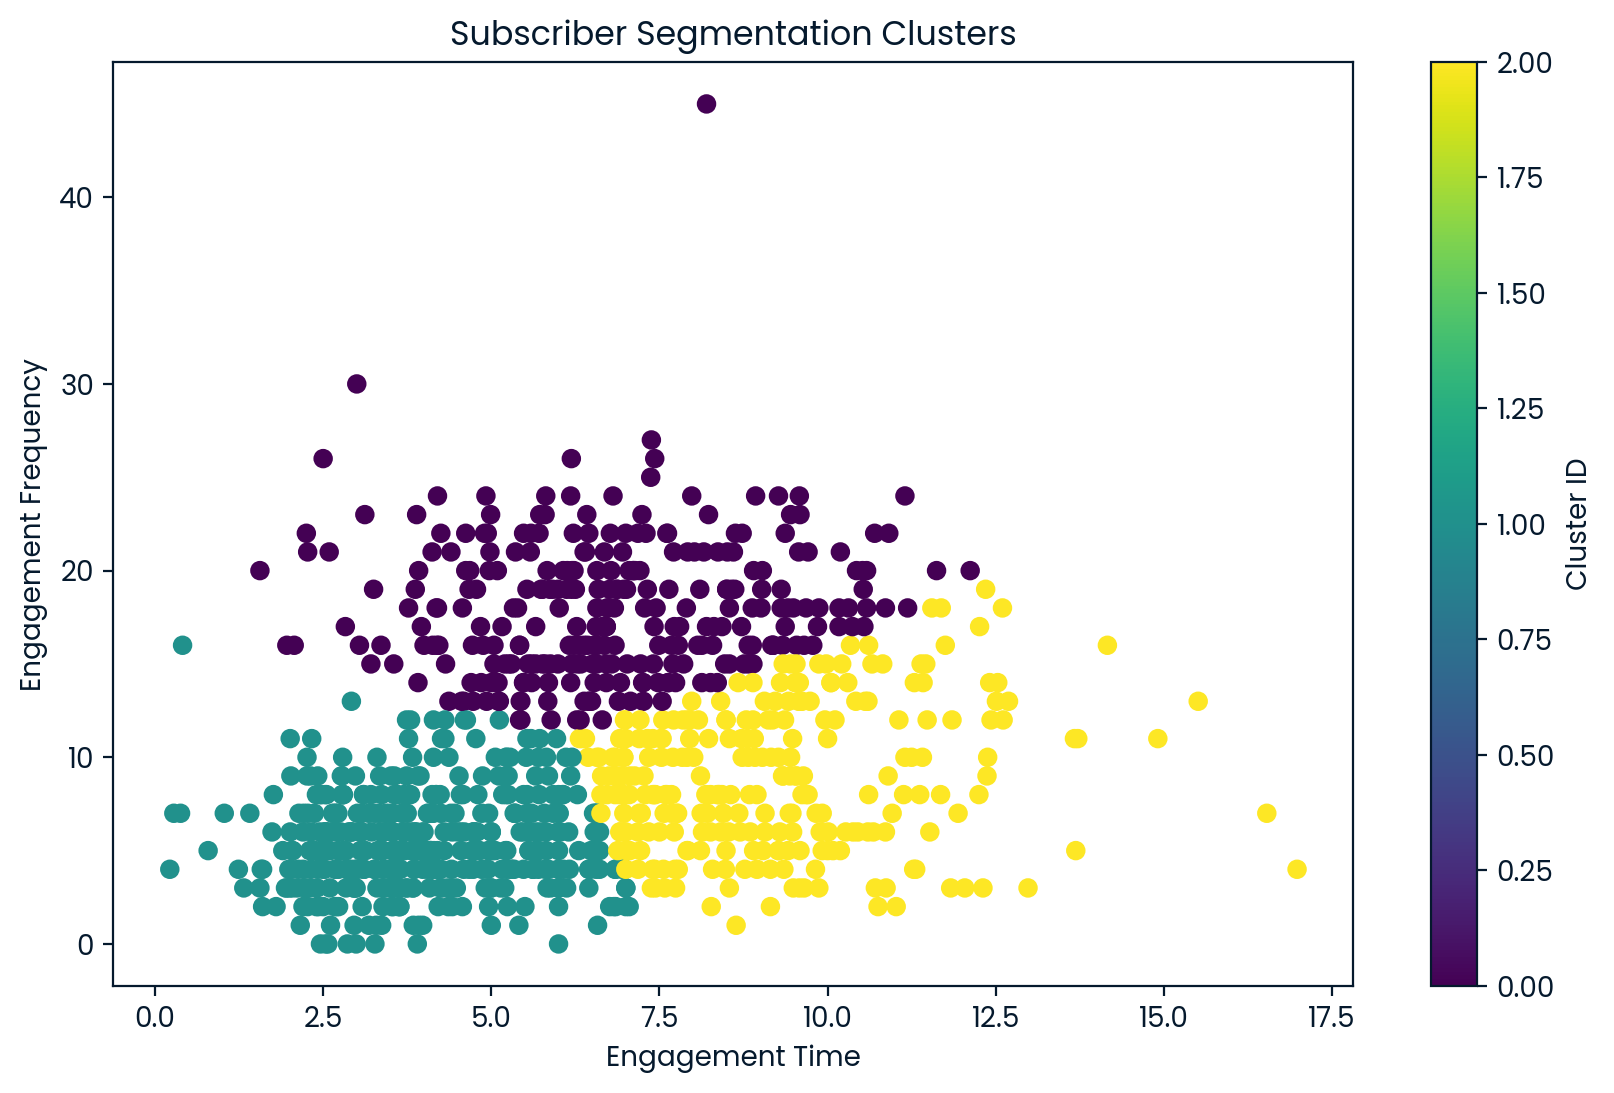

In [10]:
# Visualization of clustering results
plt.figure(figsize=(10, 6))
plt.scatter(segmentation['engagement_time'], segmentation['engagement_frequency'], c=segmentation['cluster_id'], cmap='viridis', marker='o')
plt.xlabel('Engagement Time')
plt.ylabel('Engagement Frequency')
plt.title('Subscriber Segmentation Clusters')
plt.colorbar(label='Cluster ID')
plt.show()

1. The first group (Cluster 0) consists of users with low engagement time and frequency, who may be at risk of churning.

2. The second group (Cluster 1) includes users with moderate engagement frequency but varying engagement times.

3. The third group (Cluster 2) consists of users with high engagement frequency and longer engagement times on the platform, who may be the most loyal users.